# Logistic Regression on titanic dataset

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Logistic Regression](#section4)<br>
    - 4.1 [Introduction of Logistic Regression](#section401)<br>
    - 4.2 [Mathematics behind Logistic Regression](#section402)<br>
    - 4.3 [Applications of Logistic Regression](#section402)<br>
    - 4.4 [Preparing X and y using pandas](#section403)<br>
    - 4.5 [Splitting X and y into training and test datasets.](#section404)<br>
    - 4.6 [Logistic regression in scikit-learn](#section406)<br>
    - 4.7 [Using the Model for Prediction](#section407)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model Evaluation using accuracy classification score](#section501)<br>
    - 5.2 [Model Evaluation using confusion matrix](#section502)<br> 

### 1. Problem Statement

The goal is to __predict survival__ of passengers travelling in RMS __Titanic__ using __Logistic regression__.

### 2. Data Loading and Description

- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc. 
- The dataset comprises of __891 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |
| Embarked      | Port of embarkation                                       |

#### Importing packages

In [1]:
import numpy as np
import pandas as pd
# import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
#pd.reset_option('^display.', silent=True)

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv')

In [4]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

## Handling Embarked

In [7]:
# Preproceiing of data
data.groupby(['Embarked'])['Survived'].count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

In [8]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
data.Embarked.mode()

0    S
dtype: object

## mode is object  why ?

- As model can have mor than 2 mode as well that why it's bimodal.

In [10]:
data.Embarked.mode()[0]

'S'

In [11]:
data.Embarked = data.Embarked.fillna(data.Embarked.mode()[0])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Handling age

<AxesSubplot:xlabel='Age', ylabel='Density'>

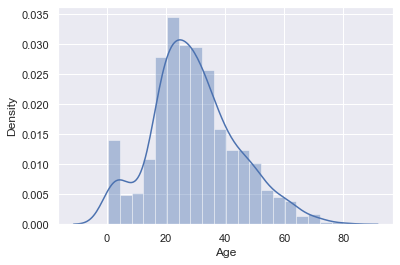

In [13]:
sns.distplot(data.Age)

In [14]:
data.Age.median()

28.0

In [15]:
data.Age.fillna(data.Age.median(),inplace= True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Drop the cabin

In [17]:
data.drop('Cabin',axis =1,inplace = True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Creating new feature "Family Size"

###  Family size = SibSp + Parch +1

- Sibsp = Sibling and spouse
- Parch = Parent and child
-  1 = Person himself or herself

In [19]:
data['family_size'] = data.SibSp + data.Parch +1

In [20]:
# As bymistake creted to drop Family_Size
# data.drop('Family_Size',axis=1,inplace = True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  family_size  891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [22]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [23]:
data.family_size.unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

- Droping columns 'Name','Ticket','SibSp','Parch','PassengerId'

In [24]:
drop_col = ['Name','Ticket','SibSp','Parch','PassengerId']

In [25]:
data.drop(drop_col,axis= 1, inplace = True)

In [26]:
data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1
5,0,3,male,28.0,8.4583,Q,1
6,0,1,male,54.0,51.8625,S,1
7,0,3,male,2.0,21.0750,S,5
8,1,3,female,27.0,11.1333,S,3
9,1,2,female,14.0,30.0708,C,2


# EDA

In [27]:
# How many survived
data['Survived'].sum()

342

In [28]:
data.Survived.count()

891

In [29]:
data.shape

(891, 7)

In [30]:
data.shape[0]

891

In [31]:
# How many % of people survived ?
data.Survived.sum()/data.shape

array([ 0.38383838, 48.85714286])

In [32]:
pct_survived = (data.Survived.sum()/data.shape[0]).round(2)*100
print(pct_survived,'%')

38.0 %


In [33]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex'>

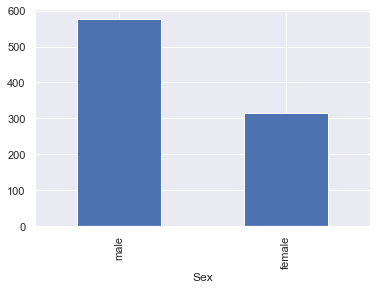

In [34]:
# What is distribution of male or female
data.groupby(['Sex'])['Sex'].count().sort_values(ascending= False).plot(kind='bar')

<AxesSubplot:xlabel='Sex'>

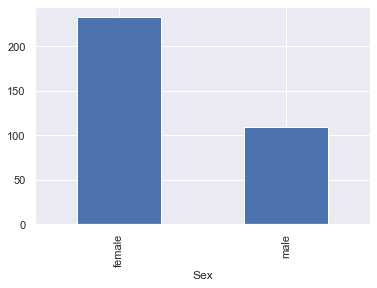

In [35]:
# How Many Male or female survived
data.groupby(['Sex'])['Survived'].sum().sort_values(ascending= False).plot(kind='bar')

<AxesSubplot:xlabel='Sex'>

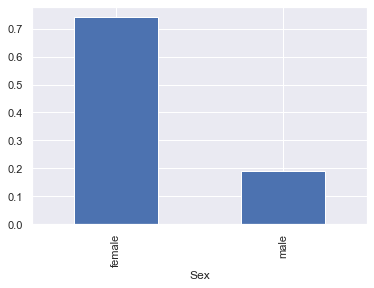

In [36]:
(data.groupby(['Sex'])['Survived'].sum()/data.groupby(['Sex'])['Survived'].count()).plot(kind='bar')

<AxesSubplot:xlabel='Embarked'>

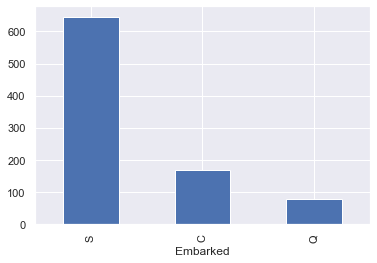

In [37]:
data.groupby(['Embarked'])['Embarked'].count().sort_values(ascending= False).plot(kind='bar')

<AxesSubplot:xlabel='Pclass'>

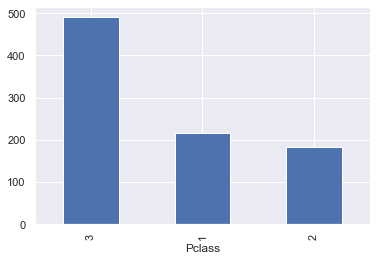

In [38]:
data.groupby(['Pclass'])['Pclass'].count().sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:xlabel='Pclass'>

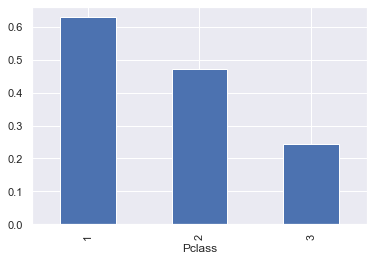

In [39]:
# Among the classes % of survived
(data.groupby(['Pclass'])['Survived'].sum()/data.groupby(['Pclass'])['Survived'].count())#.plot(kind = 'bar')
(data.groupby(['Pclass'])['Survived'].sum()/data.groupby(['Pclass'])['Survived'].count()).plot(kind = 'bar')

In [40]:
data['Fare'].mean()

32.2042079685746

In [41]:
data.groupby(['Survived'])['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [42]:
data.groupby(['Survived'])['Age'].mean()

Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64

### Draw a pair plot to know the joint relationship among 'Fare','Age','Pclass' & 'Survived'

Text(0.5, 1.0, 'Pair Plot')

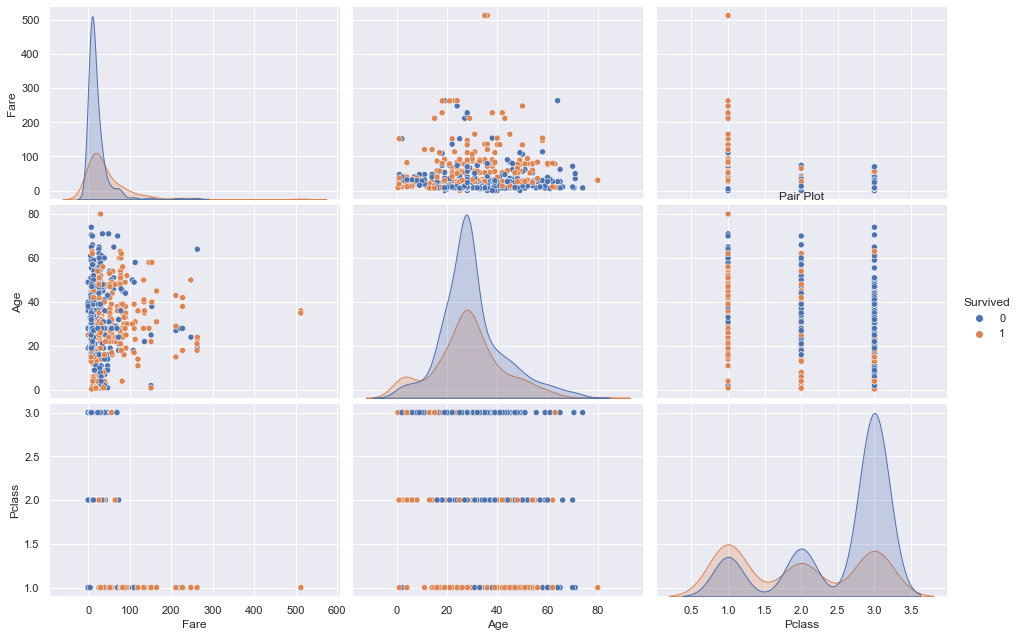

In [43]:
sns.pairplot(data[['Fare','Age','Pclass','Survived']],vars = ['Fare','Age','Pclass'],
             hue='Survived',dropna= True,height= 3,aspect = 1.5)
plt.title('Pair Plot')

## Create a dummy variable for our categorical variable 

In [44]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [45]:
data.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [46]:
cat_cols = ['Sex','Embarked']

In [47]:
data_with_dummies = pd.get_dummies(data,columns = cat_cols,drop_first= True)

In [48]:
data_with_dummies.head()

,Survived,Pclass,Age,Fare,family_size,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,1,0,1
1,1,1,38.0,71.2833,2,0,0,0
2,1,3,26.0,7.9250,1,0,0,1
3,1,1,35.0,53.1000,2,0,0,1
4,0,3,35.0,8.0500,1,1,0,1


### Established coorelation between all features using heatmap

Text(0.5, 1.0, 'Coorelations between features ')

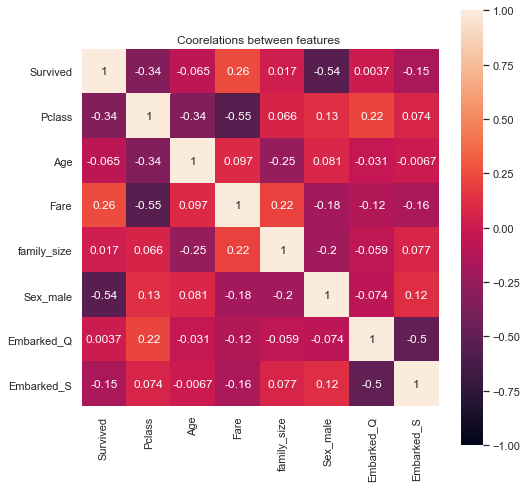

In [49]:
corr = data_with_dummies.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot = True, square= True,vmin = -1,vmax = 1)
plt.title('Coorelations between features ')

* Age and Pclass is negatively corelated with survived
* Fare and FamilySize are positively coorelated with survived

# 4. Logistic Regression

- Logistic regression is technique used for solving the classification problem .
- Classification is nothing but a problem of **identifying** to which of a set of categories a new observations belongs.

# 4.4 Preparing X and Y using pandas

In [50]:
data_with_dummies.head()

,Survived,Pclass,Age,Fare,family_size,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,1,0,1
1,1,1,38.0,71.2833,2,0,0,0
2,1,3,26.0,7.9250,1,0,0,1
3,1,1,35.0,53.1000,2,0,0,1
4,0,3,35.0,8.0500,1,1,0,1


In [51]:
data_with_dummies.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'family_size', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [52]:
features = ['Pclass', 'Age', 'Fare', 'family_size', 'Sex_male','Embarked_Q', 'Embarked_S'];
target = ['Survived'];

In [53]:
x = data_with_dummies[features]
y = data_with_dummies[target]

# 4.5 Splitting X and Y into training and test dataset.

In [54]:
# importing of train and test split
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.20,random_state= 1)

In [56]:
print('Train cases as below')
print('x_train shape',x_train.shape)
print('y_train shape',y_train.shape)
print('Test Case as below')
print('x_test shape',x_test.shape)
print('y_test shape',y_test.shape)

Train cases as below
x_train shape (712, 7)
y_train shape (712, 1)
Test Case as below
x_test shape (179, 7)
y_test shape (179, 1)


## 4.6 Logistic regression in scikit -learn

1. Load the algorathim
2. Instantiate and fit the model to training dateset.
3. Prediction on the test set

The code block as below

- from sklearn.Linear_model import LogisticRegression
   - logreg = LogisticRegression()
  
   -logreg.fit(x_train,y_train) 
   -accuracy_score(y_test,y_pred_test)

In [57]:
# Loading of model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

## 4.7 Using model for prediction

In [58]:
# Implementation of model for predict
y_pred_train = logreg.predict(x_train)

In [59]:
print(y_pred_train)

[0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1
 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0
 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1
 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1
 0 1 1 1 0 1 1 1 0 1 0 1 

In [60]:
y_pred_test = logreg.predict(x_test)

In [61]:
x_test.shape

(179, 7)

In [62]:
probabilities = logreg.predict_proba(x_test)

In [63]:
print(probabilities)

[[0.13226558 0.86773442]
 [0.91176552 0.08823448]
 [0.13136905 0.86863095]
 [0.33433287 0.66566713]
 [0.12379181 0.87620819]
 [0.88750419 0.11249581]
 [0.85843045 0.14156955]
 [0.09646347 0.90353653]
 [0.43060667 0.56939333]
 [0.37062368 0.62937632]
 [0.90200524 0.09799476]
 [0.41013943 0.58986057]
 [0.72185884 0.27814116]
 [0.76044588 0.23955412]
 [0.33439345 0.66560655]
 [0.49223395 0.50776605]
 [0.92046431 0.07953569]
 [0.91210931 0.08789069]
 [0.93363164 0.06636836]
 [0.30930413 0.69069587]
 [0.92340971 0.07659029]
 [0.88538263 0.11461737]
 [0.03929446 0.96070554]
 [0.67415345 0.32584655]
 [0.26490104 0.73509896]
 [0.90856905 0.09143095]
 [0.05707251 0.94292749]
 [0.28359978 0.71640022]
 [0.74644905 0.25355095]
 [0.04871319 0.95128681]
 [0.37298136 0.62701864]
 [0.49154045 0.50845955]
 [0.75160241 0.24839759]
 [0.44086155 0.55913845]
 [0.91798271 0.08201729]
 [0.44919413 0.55080587]
 [0.56895631 0.43104369]
 [0.91179848 0.08820152]
 [0.40702468 0.59297532]
 [0.88359648 0.11640352]


## 4.8 Play with threshold

In [64]:
type(probabilities)

numpy.ndarray

In [65]:
probabilities_1 = probabilities[:,1]
probabilities_0 = probabilities[:,0]

In [66]:
print(probabilities_1)

[0.86773442 0.08823448 0.86863095 0.66566713 0.87620819 0.11249581
 0.14156955 0.90353653 0.56939333 0.62937632 0.09799476 0.58986057
 0.27814116 0.23955412 0.66560655 0.50776605 0.07953569 0.08789069
 0.06636836 0.69069587 0.07659029 0.11461737 0.96070554 0.32584655
 0.73509896 0.09143095 0.94292749 0.71640022 0.25355095 0.95128681
 0.62701864 0.50845955 0.24839759 0.55913845 0.08201729 0.55080587
 0.43104369 0.08820152 0.59297532 0.11640352 0.58050078 0.49962962
 0.83337968 0.3447142  0.4869531  0.06875992 0.05719193 0.17089737
 0.61678174 0.33310675 0.31428436 0.85000874 0.30792338 0.18764917
 0.08526911 0.5699857  0.23228718 0.22489846 0.02345788 0.64457214
 0.21194111 0.12321483 0.21326454 0.34877099 0.4810077  0.5739068
 0.12169873 0.13272299 0.75515888 0.11377218 0.0759779  0.0694848
 0.4372082  0.08823448 0.58577475 0.22988047 0.90346916 0.12639085
 0.3208242  0.95920433 0.09760476 0.01917289 0.0882432  0.07124464
 0.88425781 0.08526819 0.0882432  0.12321451 0.54122834 0.711393

In [67]:
x_test.head()

,Pclass,Age,Fare,family_size,Sex_male,Embarked_Q,Embarked_S
862,1,48.0,25.9292,1,0,0,1
223,3,28.0,7.8958,1,1,0,1
84,2,17.0,10.5000,1,0,0,1
680,3,28.0,8.1375,1,0,1,0
535,2,7.0,26.2500,3,0,0,1


In [68]:
test_predictions = x_test.copy()

In [69]:
test_predictions.head()

,Pclass,Age,Fare,family_size,Sex_male,Embarked_Q,Embarked_S
862,1,48.0,25.9292,1,0,0,1
223,3,28.0,7.8958,1,1,0,1
84,2,17.0,10.5000,1,0,0,1
680,3,28.0,8.1375,1,0,1,0
535,2,7.0,26.2500,3,0,0,1


In [70]:
# add y in x_test data set
test_predictions['actual'] = y_test

In [71]:
test_predictions.head()

,Pclass,Age,Fare,family_size,Sex_male,Embarked_Q,Embarked_S,actual
862,1,48.0,25.9292,1,0,0,1,1
223,3,28.0,7.8958,1,1,0,1,0
84,2,17.0,10.5000,1,0,0,1,1
680,3,28.0,8.1375,1,0,1,0,0
535,2,7.0,26.2500,3,0,0,1,1


In [72]:
test_predictions['predicted'] = y_pred_test

In [73]:
test_predictions['probability']=probabilities_1

In [74]:
test_predictions.head()

,Pclass,Age,Fare,family_size,Sex_male,Embarked_Q,Embarked_S,actual,predicted,probability
862,1,48.0,25.9292,1,0,0,1,1,1,0.867734
223,3,28.0,7.8958,1,1,0,1,0,0,0.088234
84,2,17.0,10.5000,1,0,0,1,1,1,0.868631
680,3,28.0,8.1375,1,0,1,0,0,1,0.665667
535,2,7.0,26.2500,3,0,0,1,1,1,0.876208


In [75]:
test_predictions['new_prediction_0_6'] = 0 # Create a new column to fill it with prediction using threshold as 0.6

In [76]:
test_predictions.loc[test_predictions['probability']>=0.6,'new_prediction_0_6']=1

In [77]:
test_predictions.head(20)

,Pclass,Age,Fare,family_size,Sex_male,Embarked_Q,Embarked_S,actual,predicted,probability,new_prediction_0_6
862,1,48.0,25.9292,1,0,0,1,1,1,0.867734,1
223,3,28.0,7.8958,1,1,0,1,0,0,0.088234,0
84,2,17.0,10.5000,1,0,0,1,1,1,0.868631,1
680,3,28.0,8.1375,1,0,1,0,0,1,0.665667,1
535,2,7.0,26.2500,3,0,0,1,1,1,0.876208,1
623,3,21.0,7.8542,1,1,0,1,0,0,0.112496,0
148,2,36.5,26.0000,3,1,0,1,0,0,0.141570,0
3,1,35.0,53.1000,2,0,0,1,1,1,0.903537,1
34,1,28.0,82.1708,2,1,0,0,0,1,0.569393,0
241,3,28.0,15.5000,2,0,1,0,1,1,0.629376,1


# 5. Model Evaluation

- Error is the deviation of the value predicted by the model with the true values.
- We will use **accuracy score_and_confusion matrix** for evaluation.

## 5.1 Model evaluation using accuracy classification score

In [78]:
y_test

,Survived
862,1
223,0
84,1
680,0
535,1
623,0
148,0
3,1
34,0
241,1


In [79]:
y_pred_test

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1], dtype=int64)

In [80]:
from sklearn.metrics import accuracy_score
print('Accuracy score of test data is :',accuracy_score(y_test,y_pred_test))

Accuracy score of test data is : 0.7932960893854749


In [81]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [82]:
# check data impbalance ,here 60-40 hence is balance.
data.Survived.sum()/data.shape[0]

0.3838383838383838

In [83]:
# Import and implement confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred_test)
print(conf_matrix)

[[89 17]
 [20 53]]


In [84]:
type(conf_matrix)

numpy.ndarray

In [85]:
# converting numpy array to dataFrame
c_matrix = pd.DataFrame(confusion_matrix(y_test,y_pred_test))
print(c_matrix)

    0   1
0  89  17
1  20  53


In [86]:
c_matrix.index = ['Actual Died ','Actual Survived']
c_matrix.columns = ['Predicted Died','Predicted Survived']
print(c_matrix)
print('Total correct prdictsion is :',89+53)
print('Total incorrect prediction or error is', 20+17)

                 Predicted Died  Predicted Survived
Actual Died                  89                  17
Actual Survived              20                  53
Total correct prdictsion is : 142
Total incorrect prediction or error is 37


In [87]:
# confusion matrix using threshhold 0.6
c_matrix_6 = pd.DataFrame(confusion_matrix(y_test,test_predictions['new_prediction_0_6']))
print(c_matrix_6)

    0   1
0  97   9
1  30  43


In [88]:
c_matrix_6.index = ['Actual Died ','Actual Survived']
c_matrix_6.columns = ['Predicted Died','Predicted Survived']
print(c_matrix_6)
print('Total correct prdictsion is :',97+43)
print('Total incorrect prediction or error is', 30+9)

                 Predicted Died  Predicted Survived
Actual Died                  97                   9
Actual Survived              30                  43
Total correct prdictsion is : 140
Total incorrect prediction or error is 39


## Precision , Recall and F1 score

In [89]:
# Precision
from sklearn.metrics import precision_score
precision_train = precision_score(y_train,y_pred_train)
precision_test = precision_score(y_test,y_pred_test)
print('Precision Score for Train data :',precision_train)
print('Precision Score for Test data :',precision_test)

Precision Score for Train data : 0.7470817120622568
Precision Score for Test data : 0.7571428571428571


In [90]:
#Recall
from sklearn.metrics import recall_score
recall_train= recall_score(y_train,y_pred_train)
recall_test = recall_score(y_test,y_pred_test)
print('Recall Score for Train data :',recall_train)
print('Recall Score for Test data :',recall_test)

Recall Score for Train data : 0.7137546468401487
Recall Score for Test data : 0.726027397260274


In [91]:
# F1 score
from sklearn.metrics import f1_score
f1_score_train = f1_score(y_train,y_pred_train)
f1_score_test = f1_score(y_test,y_pred_test)
print('F1 Score for Train data :',f1_score_train)
print('F1 Score for Test data :',f1_score_test)

F1 Score for Train data : 0.7300380228136882
F1 Score for Test data : 0.7412587412587412


## Classification Report

In [92]:
# Classification report of Train Data
from sklearn.metrics import classification_report
c_report_train = classification_report(y_train,y_pred_train)
print('Classification Report of Train Data\n',c_report_train)

Classification Report of Train Data
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       443
           1       0.75      0.71      0.73       269

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712



In [93]:
# Classification report of Test Data
from sklearn.metrics import classification_report
c_report_test = classification_report(y_test,y_pred_test)
print('Classification Report of Test Data\n',c_report_test)

Classification Report of Test Data
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       106
           1       0.76      0.73      0.74        73

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



##  Model evaluation using AUC_ROC curve

In [99]:
from sklearn import metrics
probs_train = logreg.predict_proba(x_train)

In [100]:
probs_train

array([[0.90473077, 0.09526923],
       [0.04877917, 0.95122083],
       [0.22558772, 0.77441228],
       ...,
       [0.69903564, 0.30096436],
       [0.42898183, 0.57101817],
       [0.88749046, 0.11250954]])

In [101]:
preds_train = probs_train[:,1]

In [102]:
preds_train

array([0.09526923, 0.95122083, 0.77441228, 0.23662469, 0.07813888,
       0.9395706 , 0.3165808 , 0.0882432 , 0.94884307, 0.12639085,
       0.91759358, 0.51188261, 0.35020032, 0.66560655, 0.76143684,
       0.74440672, 0.90926158, 0.23789453, 0.86088702, 0.09972192,
       0.22489771, 0.12878199, 0.79861479, 0.12321451, 0.35723853,
       0.34835744, 0.83489813, 0.83721643, 0.26125673, 0.50776605,
       0.04693295, 0.94818771, 0.08477055, 0.12114706, 0.21438375,
       0.18777787, 0.06880492, 0.12632171, 0.9659059 , 0.72197477,
       0.25949384, 0.50837177, 0.12321451, 0.29078222, 0.34182501,
       0.10986779, 0.37156613, 0.96282749, 0.55785735, 0.79354139,
       0.38361314, 0.38414069, 0.18140708, 0.25688204, 0.19996983,
       0.06174663, 0.62248227, 0.45123763, 0.58899584, 0.636318  ,
       0.0937432 , 0.06301277, 0.18904485, 0.11512227, 0.07903846,
       0.04266162, 0.0793623 , 0.80630747, 0.77471893, 0.24536809,
       0.93948414, 0.05534671, 0.12219423, 0.40012279, 0.56448

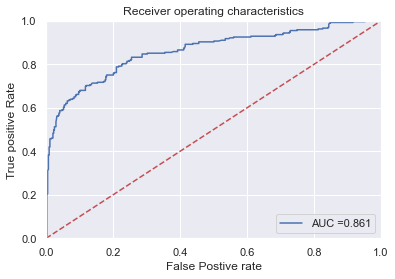

In [106]:
# ROC for Train set
from sklearn import metrics
probs_train = logreg.predict_proba(x_train)
preds_train = probs_train[:,1]

fpr_train,tpr_train,threshold_train = metrics.roc_curve(y_train,preds_train)
roc_auc_train = metrics.auc(fpr_train,tpr_train)

import matplotlib.pyplot as plt
plt.title('Receiver operating characteristics')
plt.plot(fpr_train,tpr_train,'b',label = 'AUC =%0.3f'% roc_auc_train)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive Rate')
plt.xlabel('False Postive rate')
plt.show()

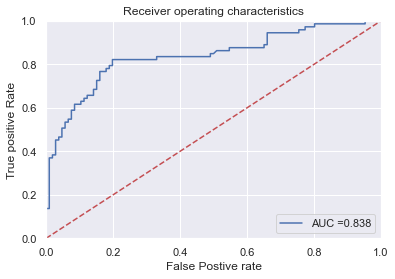

In [107]:
# ROC for Test set
from sklearn import metrics
probs_test = logreg.predict_proba(x_test)
preds_test = probs_test[:,1]

fpr_test,tpr_test,threshold_test = metrics.roc_curve(y_test,preds_test)
roc_auc_test = metrics.auc(fpr_test,tpr_test)

import matplotlib.pyplot as plt
plt.title('Receiver operating characteristics')
plt.plot(fpr_test,tpr_test,'b',label = 'AUC =%0.3f'% roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive Rate')
plt.xlabel('False Postive rate')
plt.show()

## Calculating probablitiy from coefficients

In [94]:
logreg.coef_

array([[-1.17667395e+00, -3.85595608e-02,  7.02459225e-04,
        -1.64282333e-01, -2.62163439e+00,  2.87127918e-02,
        -3.73520671e-01]])

In [95]:
x_train.columns

Index(['Pclass', 'Age', 'Fare', 'family_size', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [96]:
logreg.intercept_

array([5.42819545])

In [97]:
test_predictions.head()

,Pclass,Age,Fare,family_size,Sex_male,Embarked_Q,Embarked_S,actual,predicted,probability,new_prediction_0_6
862,1,48.0,25.9292,1,0,0,1,1,1,0.867734,1
223,3,28.0,7.8958,1,1,0,1,0,0,0.088234,0
84,2,17.0,10.5000,1,0,0,1,1,1,0.868631,1
680,3,28.0,8.1375,1,0,1,0,0,1,0.665667,1
535,2,7.0,26.2500,3,0,0,1,1,1,0.876208,1


In [98]:
test_predictions.to_csv('test_predictions.csv')